# Preprocesamiento y analisis de variables meteorologicas de las EM. in situ y satelitales.

## 1.Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import seaborn as sns
import os     # sirve para manipular el sistema operativo
# plt.rcParams['text.usetex'] = True

## 2. Funciones

In [3]:
def cambiar_directorio(dir):
    os.chdir(dir)

In [4]:
def leer_datos(file_name):
    df = pd.read_csv(file_name)
    return df

In [5]:
def visualizacion_variables(df, title):
    fig, axes = plt.subplots(nrows=6,ncols= 1, figsize=(20,15))
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['temperatura']), ax=axes[0], color='red')
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['humedad']), ax=axes[1], color='blue')
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['ghi']), ax=axes[2], color='orange')
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['vel_viento']), ax=axes[3], color='green')
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['dir_viento']), ax=axes[4], color='brown')
    sns.lineplot(data = df, x= pd.to_datetime(df.index), y = np.array(df['precipitacion']), ax=axes[5], color='purple')

    # configuracion limites
    for ax in axes:
        ax.set_xlim(pd.to_datetime(df.index[0]), pd.to_datetime(df.index[-1]))

    # etiquetas y titulos

    fig.suptitle(title, fontsize=16)
    axes[0].set_ylabel('Temperatura[°C]')
    axes[0].set_title('Temperatura[°C]')
    axes[1].set_ylabel('Humedad relativa [%]')
    axes[1].set_title('Humedad relativa[%]')
    axes[2].set_ylabel('Ghi [W/m^2]')
    axes[2].set_title('Ghi [W/m^2]')
    axes[3].set_ylabel('Velocidad del viento [m/s]')
    axes[3].set_title('Velocidad del viento [m/s]')
    axes[4].set_ylabel('Dirección del viento [°]')
    axes[4].set_title('Dirección del viento [°]')
    axes[5].set_ylabel('Precipitación [mm]')
    axes[5].set_title('Precipitación [mm]')

    fig.tight_layout()

## Leer Datos

In [6]:
cambiar_directorio('C:/Users/ktima/OneDrive/Escritorio/proyectos/codigos_tesis/datasets/')
udenar_df = leer_datos('udenar_variables.csv')
solcast_df = leer_datos('vm_solcast_org.csv')

Ajuste dataframe udenar


In [7]:
del(udenar_df['date.1'])
udenar_df.rename({'date':'fecha','temp':'temperatura','hum':'humedad','irrad':'ghi','speed':'vel_viento','direction':'dir_viento','rain':'precipitacion'},axis=1,inplace=True)
udenar_df.index = pd.to_datetime(udenar_df['fecha'])
del(udenar_df['fecha'])
udenar_df.head(5)

,temperatura,humedad,ghi,vel_viento,dir_viento,precipitacion
fecha,,,,,,
2022-02-26 00:00:44,13.1,99.9,2.2,6,282,0.5
2022-02-26 00:01:46,13.0,99.9,2.2,5,284,0.5
2022-02-26 00:02:47,13.0,99.9,2.2,3,254,0.5
2022-02-26 00:03:48,13.0,99.9,2.2,4,265,0.5
2022-02-26 00:04:49,13.0,99.9,2.2,4,267,0.5


Ajsute dataframe solcast

In [8]:
solcast_df.rename({'Temperatura':'temperatura','Ghi':'ghi'},axis=1,inplace=True)
solcast_df = solcast_df.reindex(columns=['fecha','temperatura','humedad','ghi','vel_viento','dir_viento','precipitacion'])
solcast_df.index = pd.to_datetime(solcast_df['fecha'])
del(solcast_df['fecha'])
solcast_df.head(5) 

,temperatura,humedad,ghi,vel_viento,dir_viento,precipitacion
fecha,,,,,,
2022-02-26 00:00:00,12.2,98.7,0,1.0,151,18.4
2022-02-26 00:05:00,12.1,98.8,0,1.0,152,18.4
2022-02-26 00:10:00,12.0,98.8,0,1.0,152,18.4
2022-02-26 00:15:00,11.9,98.9,0,1.0,152,18.3
2022-02-26 00:20:00,11.8,98.9,0,1.0,153,18.3


## 3. Analisis de las variables meteorológicas de la EM. Satelital antes del preprocesamiento

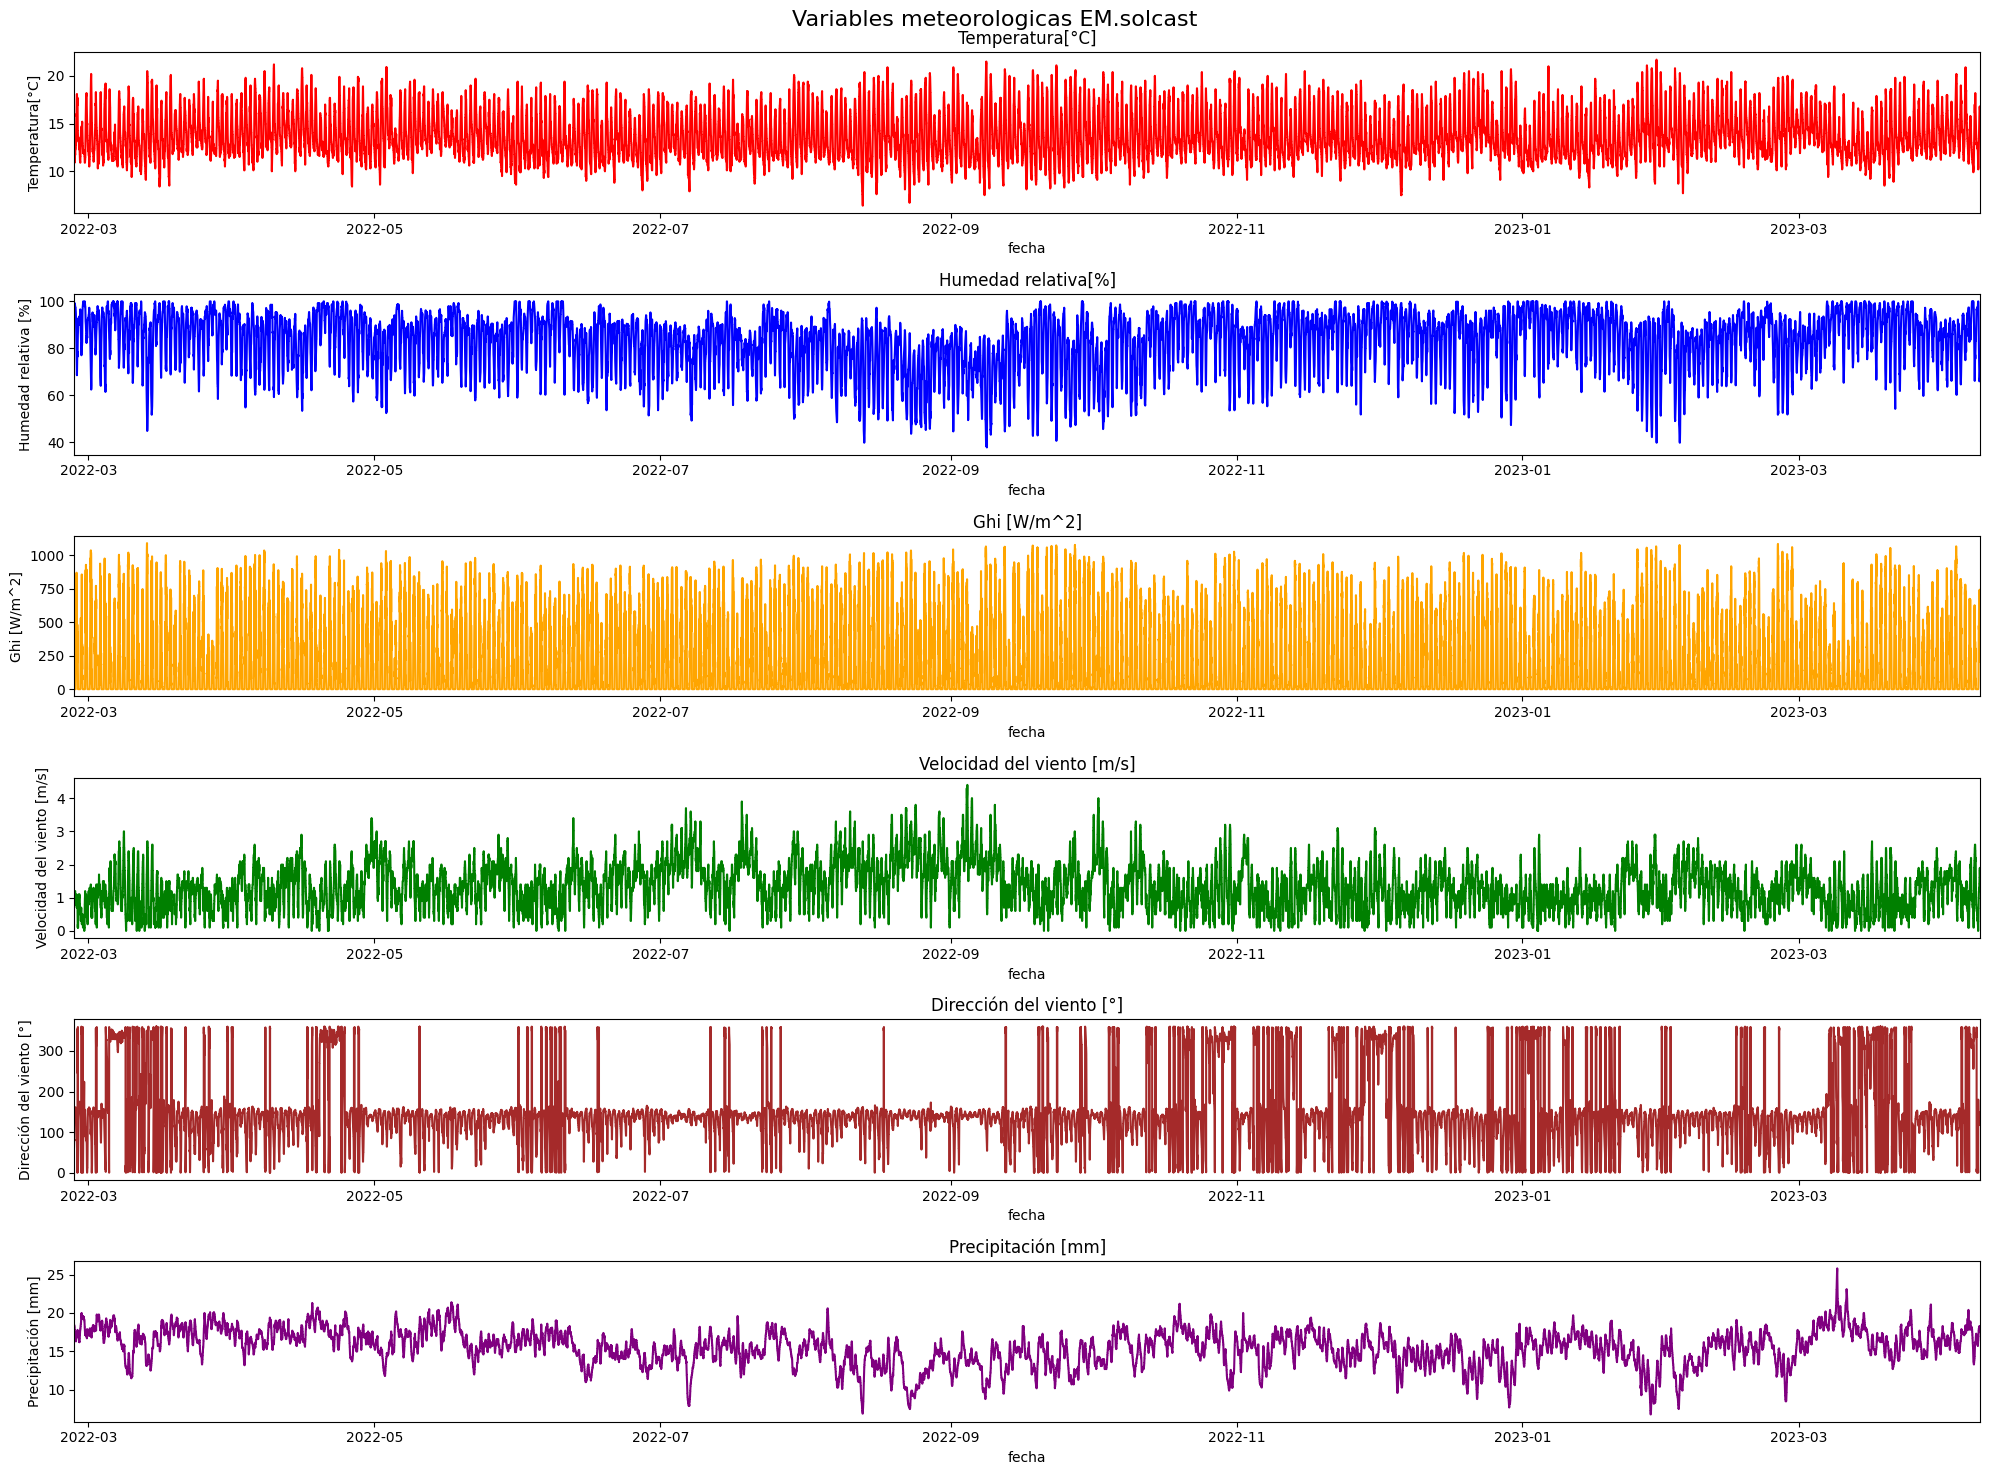

In [9]:
# Visualizacion de las varaibles

visualizacion_variables(solcast_df,'Variables meteorologicas EM.solcast')

Exploracion set de datos de EM.solcast

In [10]:
print('información de las series')
solcast_df.info()
print('-------------------------Datos duplicados-----------------------------------------')
print('Cantidad de datos duplicados: ' + str(solcast_df.index.duplicated().sum()))
print('-------------------------Datos completos----------------------------------------------')
print('Cantidad de datos completos: ' + str(solcast_df.notna().sum()))
print('-------------------------Datos nulos----------------------------------------------')
print('Cantidad de datos nulos: ' + str(solcast_df.isna().sum()))

información de las series
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117109 entries, 2022-02-26 00:00:00 to 2023-04-08 15:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperatura    117109 non-null  float64
 1   humedad        117109 non-null  float64
 2   ghi            117109 non-null  int64  
 3   vel_viento     117109 non-null  float64
 4   dir_viento     117109 non-null  int64  
 5   precipitacion  117109 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 6.3 MB
-------------------------Datos duplicados-----------------------------------------
Cantidad de datos duplicados: 0
-------------------------Datos completos----------------------------------------------
Cantidad de datos completos: temperatura      117109
humedad          117109
ghi              117109
vel_viento       117109
dir_viento       117109
precipitacion    117109
dtype: int64
-------------------------Datos n

Analisis estadistico de las variables



In [11]:
solcast_df.describe()

,temperatura,humedad,ghi,vel_viento,dir_viento,precipitacion
count,117109.000000,117109.000000,117109.000000,117109.000000,117109.000000,117109.000000
mean,13.822088,82.818559,189.267178,1.338631,153.533486,15.516686
std,2.638837,12.434748,267.993643,0.666244,85.967404,2.302100
min,6.400000,37.900000,0.000000,0.000000,0.000000,6.800000
25%,11.800000,74.600000,0.000000,0.800000,115.000000,14.200000
50%,13.300000,86.000000,0.000000,1.300000,141.000000,15.700000
75%,15.800000,92.500000,346.000000,1.800000,155.000000,17.100000
max,21.700000,100.000000,1091.000000,4.400000,360.000000,25.800000


In [12]:
def box_plot(df,variable,name,color):
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[variable], color=color)
    plt.title(name)
    plt.xlabel(name)
    plt.show()

## Diagramas de caja VM solcast

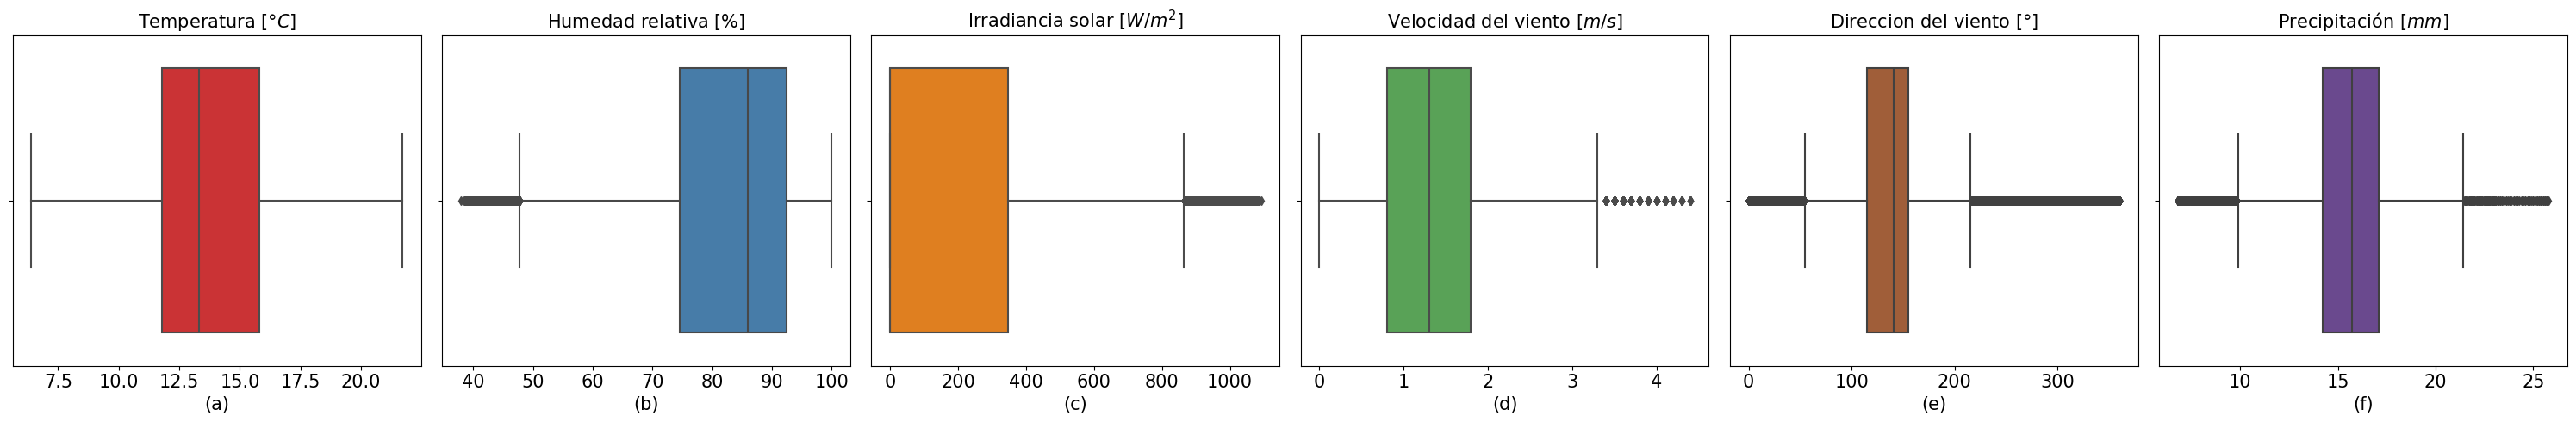

In [14]:
fig, ax = plt.subplots(1,6, figsize=(30, 5))
sns.boxplot(x = solcast_df['temperatura'], color='#e31a1c', ax=ax[0])
ax[0].set_title(r"Temperatura $[°C]$", fontsize=15)
ax[0].set_xlabel("(a)", fontsize=15)

sns.boxplot(x = solcast_df['humedad'], color='#377eb8', ax=ax[1])
ax[1].set_title(r'Humedad relativa $[\%]$', fontsize=15)
ax[1].set_xlabel('(b)', fontsize=15)

sns.boxplot(x = solcast_df['ghi'], color='#ff7f00', ax=ax[2])
ax[2].set_title(r'Irradiancia solar $[W/m^{2}]$', fontsize=15)
ax[2].set_xlabel('(c)', fontsize=15)

sns.boxplot(x = solcast_df['vel_viento'], color='#4daf4a', ax=ax[3])
ax[3].set_title(r'Velocidad del viento $[m/s]$', fontsize=15)
ax[3].set_xlabel('(d)', fontsize=15)

sns.boxplot(x = solcast_df['dir_viento'], color='#b15928', ax=ax[4])
ax[4].set_title(r'Direccion del viento $[°]$', fontsize=15)
ax[4].set_xlabel('(e)', fontsize=15)

sns.boxplot(x = solcast_df['precipitacion'], color='#6a3d9a', ax=ax[5])
ax[5].set_title(r'Precipitación $[mm]$', fontsize=15)
ax[5].set_xlabel('(f)', fontsize=15)


for axis in ax:
    axis.tick_params(axis='x', labelsize=15)
fig.tight_layout()

fig.savefig("vm_solcast_org.pdf", format='pdf', dpi=300)



In [15]:
# box_plot(solcast_df,'temperatura','Temperatura [°C]','#e31a1c')
# box_plot(solcast_df,'humedad','Humedad [%]','#377eb8')
# box_plot(solcast_df,'ghi','Irradiancia Solar [W/m^2]','#ff7f00')
# box_plot(solcast_df,'vel_viento','Velocidad del viento [m/s]','#4daf4a')
# box_plot(solcast_df,'dir_viento','Dirección del viento [°]','#b15928')
# box_plot(solcast_df,'precipitacion','Precipitación [mm]','#6a3d9a')

## 4. Preprocesamiento datos EM. Solcast

In [16]:
solc_df = pd.DataFrame(solcast_df['ghi'].copy())
filtu = (solc_df.index < pd.Timestamp('2022-03-25 00:00:00')) | (solc_df.index > pd.Timestamp('2023-1-12 00:00:00'))
solc_df = solc_df.drop(solc_df[filtu].index)
sol_df = solc_df.reset_index()

## Filtro de media movil

In [17]:
def meanfilt(df_mean,varmet,k):
    """Apply a length-k mean filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    x = df_mean[varmet] 
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y = pd.DataFrame(y)
    y.iloc[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y.iloc[j:,i] = x.iloc[:-j]
        y.iloc[:j,i] = x.iloc[0]
        y.iloc[:-j,-(i+1)] = x.iloc[j:]
        y.iloc[-j:,-(i+1)] = x.iloc[-1]
    y1 = y
    y2 = y1.mean(axis=1)
    df_mean[varmet] = y2
    dfu_vmp = df_mean.groupby(['fecha']).sum()
    return dfu_vmp

In [18]:
sol_f1_df = meanfilt(sol_df,'ghi',5)

## Estadificas luego de aplicar el filtro

In [19]:
sol_f1_df.describe()

,ghi
count,84385.000000
mean,192.515980
std,267.653949
min,0.000000
25%,0.000000
50%,2.800000
75%,364.800000
max,1065.200000


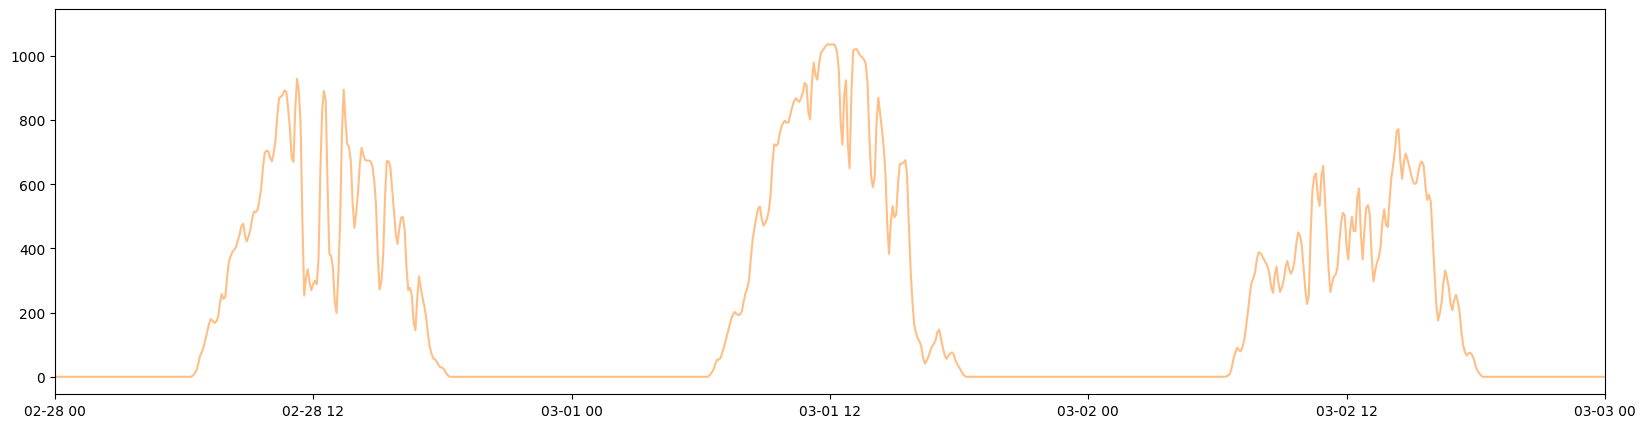

In [20]:
plt.figure(figsize=(20,5))
plt.plot(sol_f1_df['ghi'])
plt.plot(solcast_df['ghi'], alpha=0.5)
plt.xlim([datetime(2022,2,28), datetime(2022,3,3)])
plt.show()

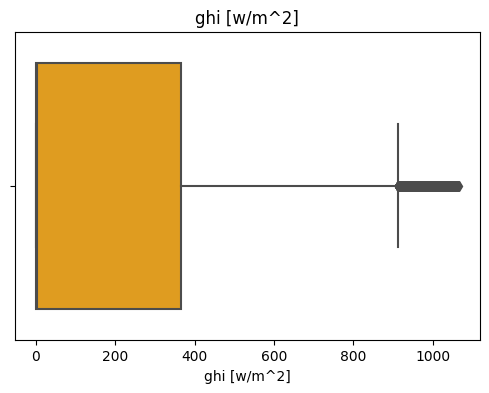

In [21]:
box_plot(sol_f1_df,'ghi','ghi [w/m^2]','orange')

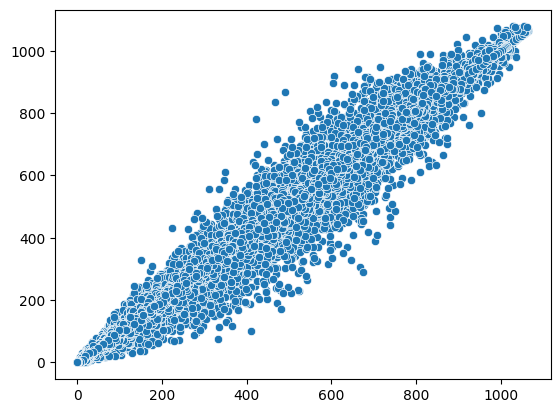

In [22]:
sns.scatterplot(x = np.array(sol_f1_df['ghi']),y = np.array(solc_df['ghi']))
plt.show()

In [25]:
# fig, ax = plt.subplots(1,6, figsize=(30, 5))
# sns.boxplot(x = sol_f1_df['temperatura'], color='#e31a1c', ax=ax[0])
# ax[0].set_title(r"Temperatura $[°C]$", fontsize=15)
# ax[0].set_xlabel("a)", fontsize=15)

# sns.boxplot(x = sol_f1_df['humedad'], color='#377eb8', ax=ax[1])
# ax[1].set_title(r'Humedad relativa $[\%]$', fontsize=15)
# ax[1].set_xlabel('b)', fontsize=15)

# sns.boxplot(x = sol_f1_df['ghi'], color='#ff7f00', ax=ax[2])
# ax[2].set_title(r'Irradiancia solar $[W/m^{2}]$', fontsize=15)
# ax[2].set_xlabel('c)', fontsize=15)

# sns.boxplot(x = sol_f1_df['vel_viento'], color='#4daf4a', ax=ax[3])
# ax[3].set_title(r'Velocidad del viento $[m/s]$', fontsize=15)
# ax[3].set_xlabel('d)', fontsize=15)

# sns.boxplot(x = sol_f1_df['dir_viento'], color='#b15928', ax=ax[4])
# ax[4].set_title(r'Direccion del viento $[°]$', fontsize=15)
# ax[4].set_xlabel('e)', fontsize=15)

# sns.boxplot(x = sol_f1_df['precipitacion'], color='#6a3d9a', ax=ax[5])
# ax[5].set_title(r'Precipitación $[mm]$', fontsize=15)
# ax[5].set_xlabel('f)', fontsize=15)


# for axis in ax:
#     axis.tick_params(axis='x', labelsize=15)
# fig.tight_layout()

# fig.savefig("vm_solcast_prep.pdf", format='pdf', dpi=300)


## 3. Analisis de las variables meteorológicas de la EM. In situ antes del preprocesamiento

In [26]:
# visualizacion_variables(udenar_df,'Variables meteorologicas EM.Udenar')

Exploracion set de datos EM.Udenar

In [23]:
print('información de las series')
udenar_df.info()
print('-------------------------Datos duplicados-----------------------------------------')
print('Cantidad de datos duplicados: ' + str(udenar_df.index.duplicated().sum()))
print('-------------------------Datos completos----------------------------------------------')
print('Cantidad de datos completos: ' + str(udenar_df.notna().sum()))
print('-------------------------Datos nulos----------------------------------------------')
print('Cantidad de datos nulos: ' + str(udenar_df.isna().sum()))

información de las series
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237835 entries, 2022-02-26 00:00:44 to 2023-04-08 15:02:49
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperatura    237835 non-null  float64
 1   humedad        237835 non-null  float64
 2   ghi            237835 non-null  float64
 3   vel_viento     237835 non-null  int64  
 4   dir_viento     237835 non-null  int64  
 5   precipitacion  237835 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 12.7 MB
-------------------------Datos duplicados-----------------------------------------
Cantidad de datos duplicados: 4909
-------------------------Datos completos----------------------------------------------
Cantidad de datos completos: temperatura      237835
humedad          237835
ghi              237835
vel_viento       237835
dir_viento       237835
precipitacion    237835
dtype: int64
-------------------------Dat

Analisis Estadistico EM.udenar

In [24]:
udenar_df.describe()

,temperatura,humedad,ghi,vel_viento,dir_viento,precipitacion
count,237835.000000,237835.000000,237835.000000,237835.000000,237835.000000,237835.000000
mean,17.086764,80.215416,167.314008,9.999727,177.029117,3.950091
std,5.142937,19.761375,253.964778,6.748421,95.875485,52.387427
min,0.700000,7.000000,-31.800000,0.000000,0.000000,0.000000
25%,13.600000,68.700000,2.200000,5.000000,93.000000,0.000000
50%,15.300000,85.000000,28.400000,9.000000,132.000000,0.000000
75%,19.800000,98.600000,256.000000,14.000000,283.000000,1.300000
max,72.800000,99.900000,1514.900000,266.000000,346.000000,1531.600000


Maximo de irradiacia solar es de 1361[W/m^2] en la parte superior de la atmosfera de la tierra

In [25]:
udenar_df['ghi'][udenar_df['ghi']>1361]  # Filtrado general

fecha
2022-03-03 12:24:06    1502.7
2022-03-03 12:26:15    1433.5
2022-03-03 12:30:12    1483.1
2022-03-03 12:32:09    1482.4
2022-03-03 12:34:09    1385.1
2022-03-03 12:42:16    1484.7
2022-03-03 12:54:16    1441.9
2022-03-05 11:38:19    1362.3
2022-03-05 11:38:19    1362.3
2022-03-05 11:38:19    1362.3
2022-03-05 12:32:17    1390.2
2022-03-05 12:32:17    1390.2
2022-03-05 12:32:17    1390.2
2022-03-05 12:34:17    1404.3
2022-03-05 12:34:17    1404.3
2022-03-05 12:34:17    1404.3
2022-03-07 11:46:46    1514.9
2022-03-07 11:48:44    1500.5
2022-03-07 11:54:40    1431.0
2022-03-07 11:58:47    1399.8
2022-03-07 12:04:39    1420.2
2022-03-07 12:32:48    1442.7
2022-03-08 12:31:33    1378.3
2022-03-11 11:45:19    1382.1
2022-03-28 12:11:13    1486.6
2022-03-28 12:17:16    1513.9
2022-03-29 11:07:55    1401.3
2022-03-29 12:30:10    1387.6
2022-03-29 12:36:06    1452.9
2022-04-09 12:17:21    1447.0
2022-04-10 11:56:09    1479.8
2022-04-27 11:12:12    1368.0
2022-06-06 11:21:29    1374.1
2022

## 4. Preprocesamiento datos EM. Udenar

Borrar datos duplicados

In [26]:
udenar_df.reset_index(inplace=True)
udenar_df['vel_viento'] = udenar_df['vel_viento']*(5/18) 
udenar_df['precipitacion'] = udenar_df['precipitacion']*(50/144) 
udenar_df['fecha'] = udenar_df['fecha'].drop_duplicates()
udenar_df = udenar_df.groupby('fecha').sum()
udenar_df.head(10)

,temperatura,humedad,ghi,vel_viento,dir_viento,precipitacion
fecha,,,,,,
2022-02-26 00:00:44,13.1,99.9,2.2,1.666667,282,0.173611
2022-02-26 00:01:46,13.0,99.9,2.2,1.388889,284,0.173611
2022-02-26 00:02:47,13.0,99.9,2.2,0.833333,254,0.173611
2022-02-26 00:03:48,13.0,99.9,2.2,1.111111,265,0.173611
2022-02-26 00:04:49,13.0,99.9,2.2,1.111111,267,0.173611
2022-02-26 00:06:52,13.0,99.9,2.2,0.555556,270,0.173611
2022-02-26 00:07:54,13.0,99.9,2.2,1.944444,265,0.173611
2022-02-26 00:08:54,13.1,99.9,2.3,1.944444,271,0.173611
2022-02-26 00:09:55,13.1,99.9,2.3,1.111111,273,0.000000


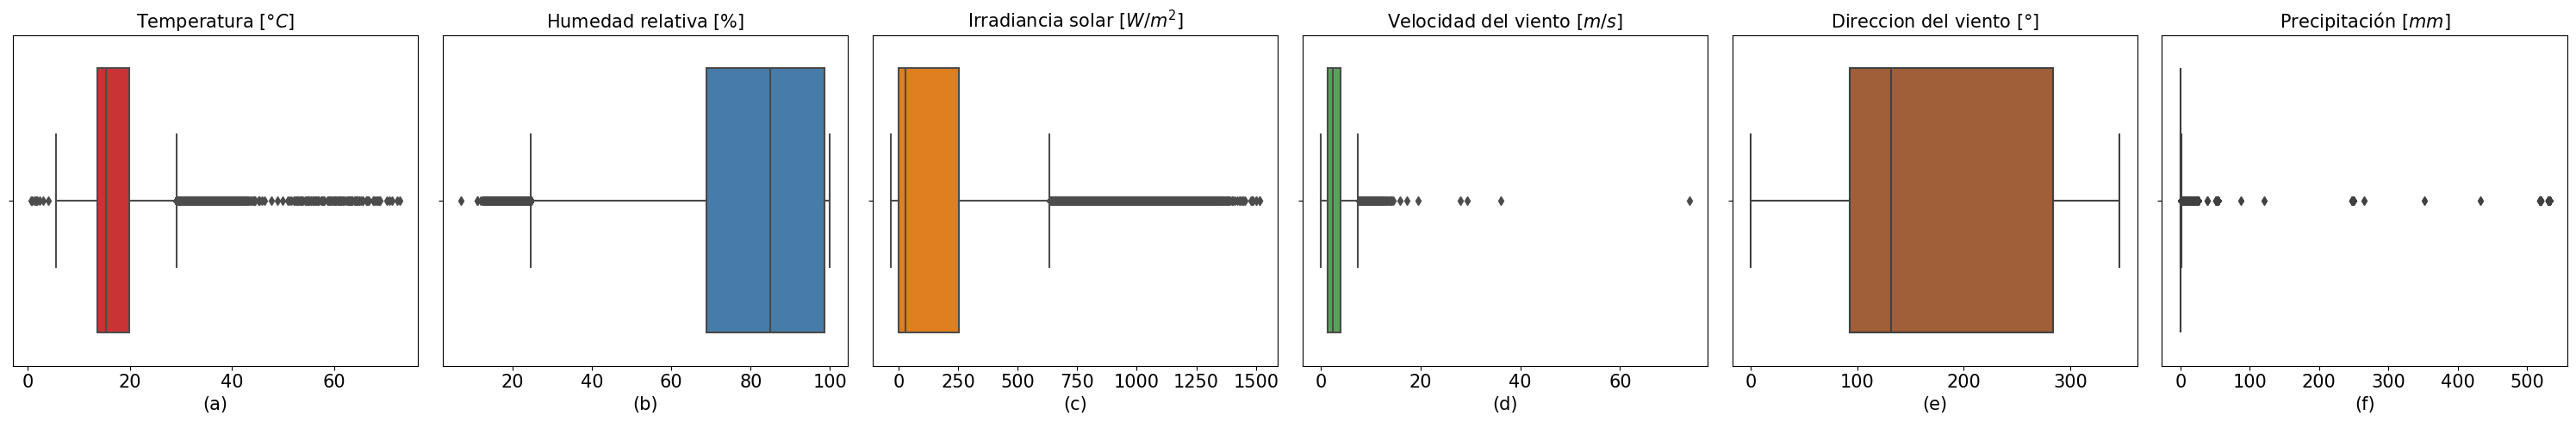

In [28]:
fig, ax = plt.subplots(1,6, figsize=(30, 5))
sns.boxplot(x = udenar_df['temperatura'], color='#e31a1c', ax=ax[0])
ax[0].set_title(r"Temperatura $[°C]$", fontsize=15)
ax[0].set_xlabel("(a)", fontsize=15)

sns.boxplot(x = udenar_df['humedad'], color='#377eb8', ax=ax[1])
ax[1].set_title(r'Humedad relativa $[\%]$', fontsize=15)
ax[1].set_xlabel('(b)', fontsize=15)

sns.boxplot(x = udenar_df['ghi'], color='#ff7f00', ax=ax[2])
ax[2].set_title(r'Irradiancia solar $[W/m^{2}]$', fontsize=15)
ax[2].set_xlabel('(c)', fontsize=15)

sns.boxplot(x = udenar_df['vel_viento'], color='#4daf4a', ax=ax[3])
ax[3].set_title(r'Velocidad del viento $[m/s]$', fontsize=15)
ax[3].set_xlabel('(d)', fontsize=15)

sns.boxplot(x = udenar_df['dir_viento'], color='#b15928', ax=ax[4])
ax[4].set_title(r'Direccion del viento $[°]$', fontsize=15)
ax[4].set_xlabel('(e)', fontsize=15)

sns.boxplot(x = udenar_df['precipitacion'], color='#6a3d9a', ax=ax[5])
ax[5].set_title(r'Precipitación $[mm]$', fontsize=15)
ax[5].set_xlabel('(f)', fontsize=15)


for axis in ax:
    axis.tick_params(axis='x', labelsize=15)
fig.tight_layout()

fig.savefig("vm_udenar_org.pdf", format='pdf', dpi=300)

In [30]:
dfa = udenar_df.copy()
dfa['fecha'] = pd.to_datetime(udenar_df.index)  # Asegurarse de que la columna de fecha esté en formato de fecha
dfa['dia'] = dfa['fecha'].dt.date  # Extraer solo la fecha sin la hora
dfa['temperatura_mayor_21'] = dfa['temperatura'] > 21  # Crear una columna de valores booleanos
porcentaje_por_dia = dfa.groupby('dia')['temperatura_mayor_21'].mean() * 100

# Paso 3: Calcula el porcentaje
print(porcentaje_por_dia)

dia
2022-02-26    25.164114
2022-02-27    10.930010
2022-02-28    16.918189
2022-03-01    30.228758
2022-03-02    22.253129
                ...    
2023-04-04    31.337047
2023-04-05    20.502092
2023-04-06     4.874652
2023-04-07     0.278552
2023-04-08    18.666667
Name: temperatura_mayor_21, Length: 331, dtype: float64


In [31]:
ude_df = pd.DataFrame(udenar_df['ghi'].copy())

## Correcion muestreo no uniforme de los datos de irradiancia

In [32]:
# empty frame with desired index
rs = pd.DataFrame(index=ude_df.iloc[1:].index).resample('2min').mean()
# array of indexes corresponding with closest timestamp after resample
idx_after = np.searchsorted(ude_df.index.values, rs.index.values+1)
# values and timestamp before/after resample
rs['after'] = ude_df.loc[ude_df.index[idx_after], 'ghi'].values
rs['before'] = ude_df.loc[ude_df.index[idx_after - 1], 'ghi'].values
rs['after_time'] = ude_df.index[idx_after]
rs['before_time'] = ude_df.index[idx_after - 1]

rs['span'] = (rs['after_time'] - rs['before_time'])
rs['after_weight'] = (rs['after_time'] - rs.index) / rs['span']
# I got errors here unless I turn the index to a series
rs['before_weight'] = (pd.Series(data=rs.index, index=rs.index) - rs['before_time']) / rs['span']
rs['Values'] = rs.eval('after * before_weight + before * after_weight')
rs['Values'][rs['span'] > pd.Timedelta('5min')] = np.nan

C:\Users\ktima\AppData\Local\Temp\ipykernel_5168\2236899638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['Values'][rs['span'] > pd.Timedelta('5min')] = np.nan


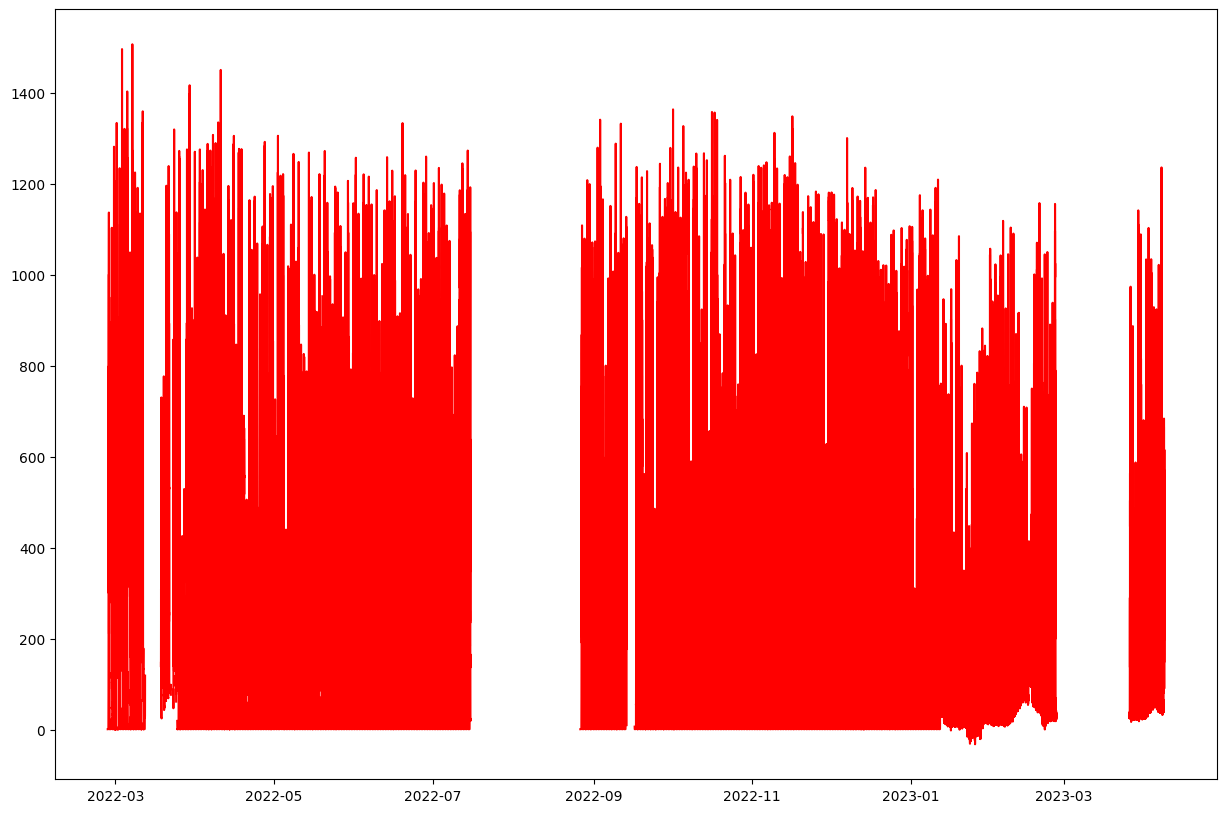

In [33]:
plt.figure(figsize=(15,10))
plt.plot(rs['Values'],color='red')
plt.show()

In [36]:
udenar_dfc = rs['Values']
udenar_dfc = pd.DataFrame(udenar_dfc)
udenar_dfc.rename({'Values': 'ghi'}, inplace=True, axis = 1)
udenar_dfc

,ghi
fecha,
2022-02-26 00:00:00,2.199889
2022-02-26 00:02:00,2.200000
2022-02-26 00:04:00,2.200000
2022-02-26 00:06:00,2.200000
2022-02-26 00:08:00,2.210000
...,...
2023-04-08 14:54:00,111.920168
2023-04-08 14:56:00,106.333333
2023-04-08 14:58:00,108.814655


## Datos faltantes GHI Udenar

In [37]:
pct_missing_data = dict(datos_faltantes = udenar_dfc.isna().sum(),
                        p_datos_faltantes = (udenar_dfc.isna().sum()/udenar_dfc.shape[0])*100,
                        datos_completos = udenar_dfc.notna().sum(),
                        p_datos_completos = (udenar_dfc.notna().sum()/udenar_dfc.shape[0])*100
                        ) 
pct_missing_data = pd.DataFrame(pct_missing_data)
pct_missing_data

,datos_faltantes,p_datos_faltantes,datos_completos,p_datos_completos
ghi,60959,20.821322,231813,79.178678


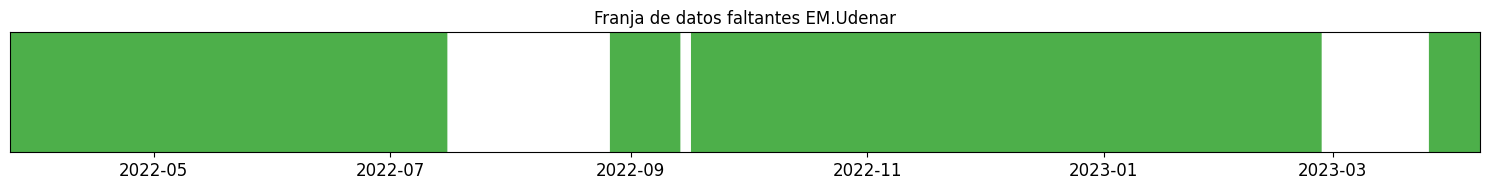

In [39]:
dfnan = udenar_dfc.copy()
dfnan = dfnan.where(~dfnan.notna(), 1) #this line will replace all not nan values to 1.

fig, ax = plt.subplots(1, 1, figsize=(15,2))
fig.patch.set_facecolor('white')

ax.plot(dfnan['ghi'], linewidth=0, marker=',')
ax.fill_between(dfnan.index, dfnan['ghi'],color = '#4daf4a')
ax.set_title('Franja de datos faltantes EM.Udenar')

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (pd.to_datetime('2022-03-25'),pd.to_datetime('2023-04-08'))
custom_ylim = (0, 1)
# Setting the values for all axes.
plt.setp(ax,
         yticks=([]),
         ylim=custom_ylim,
         xlim=custom_xlim);

plt.tick_params(labelsize=12)
plt.tight_layout()

fig.savefig("faltantes_udenar.pdf", bbox_inches='tight')
plt.show()

In [40]:
filtu = (udenar_dfc.index < pd.Timestamp('2022-03-25 00:00:00')) | (udenar_dfc.index > pd.Timestamp('2023-1-12 00:00:00'))
udenar_dfc = udenar_dfc.drop(udenar_dfc[filtu].index)

In [41]:
udenar_dfc.loc[pd.Timestamp('2022-07-15 00:00:00'):pd.Timestamp('2022-08-26 23:58:00')] = np.nan
udenar_dfc.loc[pd.Timestamp('2022-09-13 00:00:00'):pd.Timestamp('2022-09-16 23:58:00')] = np.nan

In [42]:
udenar_dfc = udenar_dfc['ghi'].interpolate(method = "pchip")
udenar_dfc = pd.DataFrame(udenar_dfc)
udenar_dfc['ghi'].loc[(udenar_dfc['ghi']<=2.3)] = 0

In [43]:
udenar_dfc.loc[pd.Timestamp('2022-07-15 00:00:00'):pd.Timestamp('2022-08-26 23:58:00')] = np.nan
udenar_dfc.loc[pd.Timestamp('2022-09-13 00:00:00'):pd.Timestamp('2022-09-16 23:58:00')] = np.nan
udenar_dfc.isna().sum()


ghi    33840
dtype: int64

In [44]:
udenar_dfc.dropna(inplace=True)

## Filtro de media movil EM. Udenar

In [46]:
udec_df = pd.DataFrame(udenar_dfc['ghi'].copy())
udec_df.reset_index(inplace=True)

In [47]:
udenar_f1_df = meanfilt(udec_df,'ghi',5)

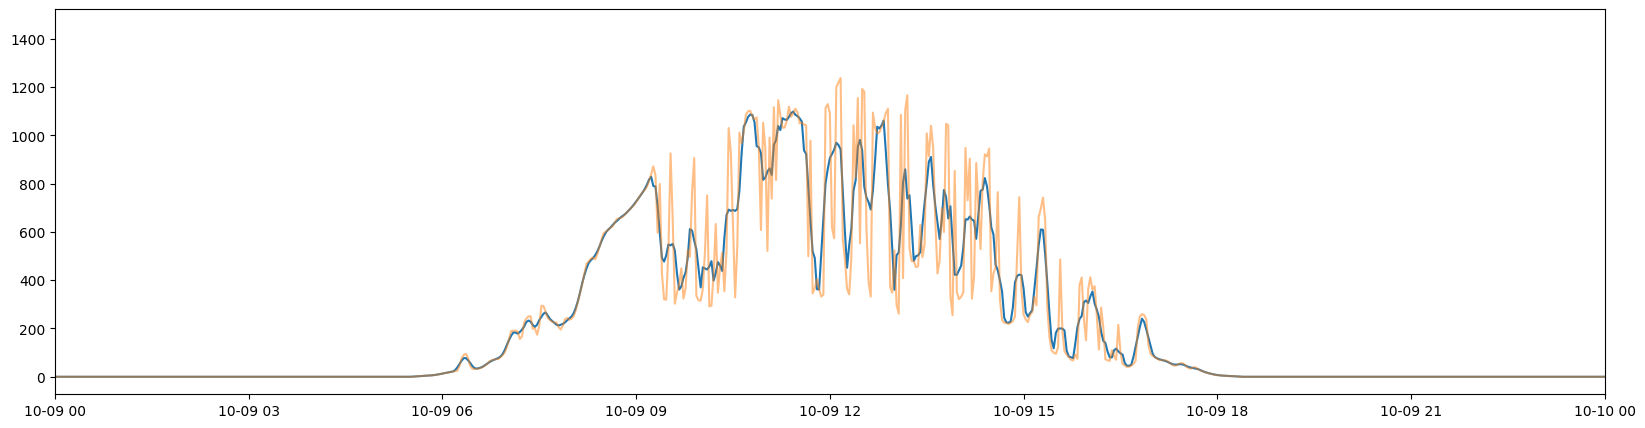

In [48]:
plt.figure(figsize=(20,5))
# plt.plot(sol_f1_df['fecha'],sol_f1_df['ghi'])
plt.plot(udenar_f1_df['ghi'])
plt.plot(udenar_dfc['ghi'], alpha=0.5)
plt.xlim([datetime(2022,10,9), datetime(2022,10,10)])
plt.xlabel('Fecha')
plt.ylabel('GHI [W/m^2]')
plt.show()

In [63]:
from scipy import stats

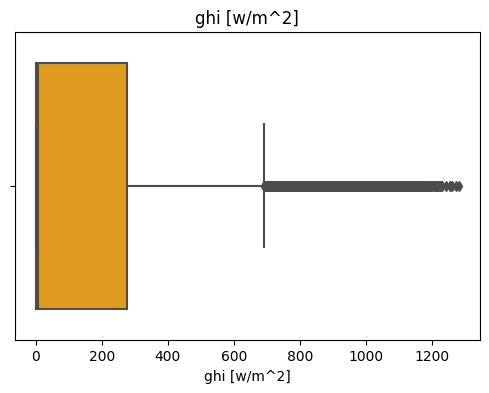

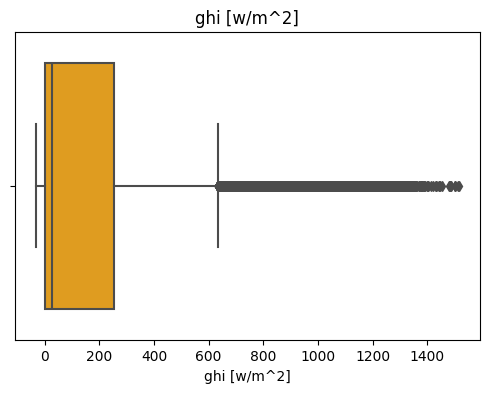

In [51]:
box_plot(udenar_f1_df,'ghi','ghi [w/m^2]','orange')
box_plot(udenar_df,'ghi','ghi [w/m^2]','orange')

## Correlaciones GHI Udenar y GHI Solcast

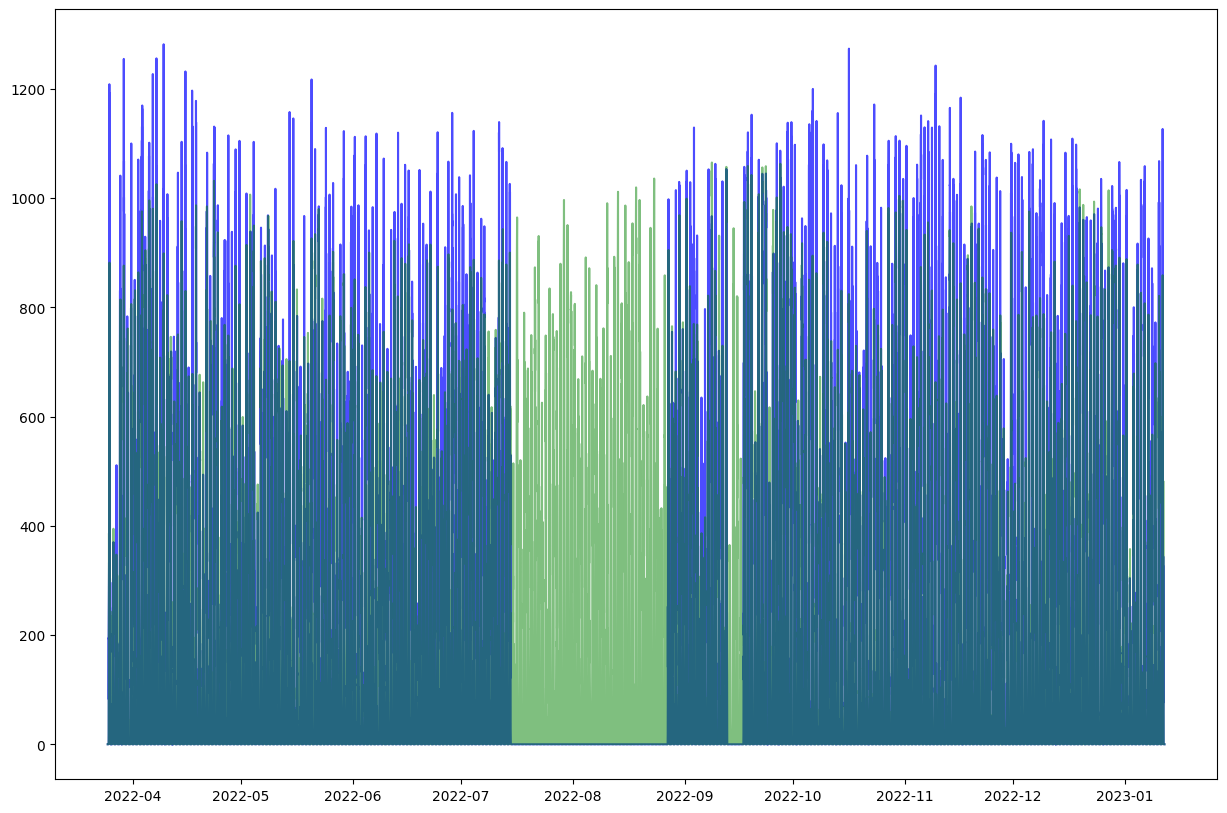

In [52]:
plt.figure(figsize=(15,10))
plt.plot(udenar_f1_df['ghi'],color='blue',alpha = 0.7)
plt.plot(sol_f1_df['ghi'], color='green',alpha = 0.5)
plt.show()

In [55]:
solup_df = sol_f1_df.resample(pd.Timedelta('2min')).interpolate(method='pchip')

In [56]:
solup_df.loc[pd.Timestamp('2022-07-15 00:00:00'):pd.Timestamp('2022-08-26 23:58:00')] = np.nan
solup_df.loc[pd.Timestamp('2022-09-13 00:00:00'):pd.Timestamp('2022-09-16 23:58:00')] = np.nan
solup_df.dropna(inplace=True)
solup_df.rename({'ghi':'ghi_sol'},axis=1,inplace=True)


(177121, 1)

In [57]:
concat_df = pd.concat([udenar_f1_df, solup_df], axis=1)
concat_df

,ghi,ghi_sol
fecha,,
2022-03-25 00:00:00,0.0,0.0
2022-03-25 00:02:00,0.0,0.0
2022-03-25 00:04:00,0.0,0.0
2022-03-25 00:06:00,0.0,0.0
2022-03-25 00:08:00,0.0,0.0
...,...,...
2023-01-11 23:52:00,0.0,0.0
2023-01-11 23:54:00,0.0,0.0
2023-01-11 23:56:00,0.0,0.0


In [58]:
correlacion_vm = concat_df[['ghi','ghi_sol']].corr()
correlacion_vm

,ghi,ghi_sol
ghi,1.000000,0.921372
ghi_sol,0.921372,1.000000


C:\Users\ktima\AppData\Local\Temp\ipykernel_7824\2051975711.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlacion_vm, dtype=np.bool))


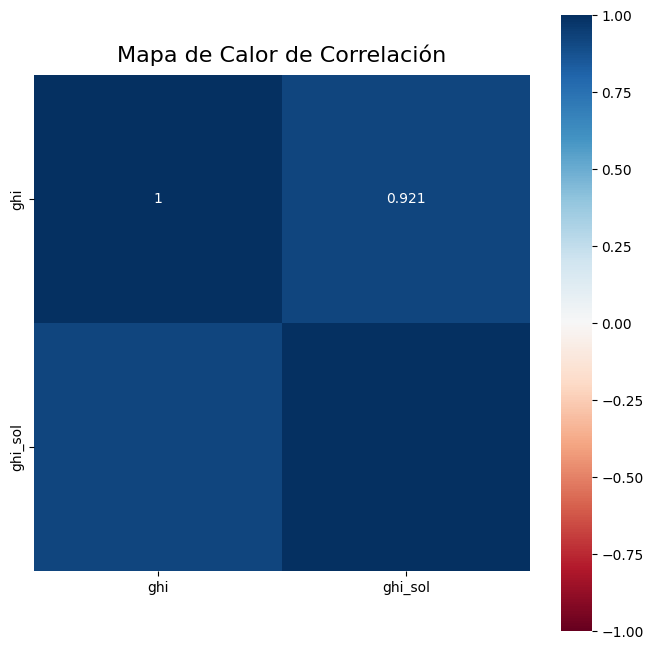

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
fig.patch.set_facecolor('white')
mask = np.triu(np.ones_like(correlacion_vm, dtype=np.bool))
heatmap = sns.heatmap(correlacion_vm, vmin=-1, vmax=1, center= 0, annot=True, fmt='.3g', cmap='RdBu', square=True) # cmap='seismic'
heatmap.set_title('Mapa de Calor de Correlación', fontdict={'fontsize':16}, pad=10);
# plt.savefig('correlacion_inicial.png', dpi=300, bbox_inches='tight')

In [ ]:
def correlacion_pearson_con_significancia(x, y, alfa=0.05):
  coef, p = stats.pearsonr(x, y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')

In [68]:
correlacion_pearson_con_significancia(concat_df['ghi'], concat_df['ghi_sol'])

Coeficiente de correlación de Pearson: 0.92
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


In [69]:
pend, interc, corr, p_valor, error_std = stats.linregress(concat_df['ghi'], concat_df['ghi_sol'])

print(f"pend = {pend:10f}")
print(f"interc = {interc:10f}")
print(f"corr = {corr:10f}")
print(f"p_valor = {p_valor:10f}")
print(f"error_std = {error_std:10f}")

pend =   0.968844
interc =  29.420789
corr =   0.921372
p_valor =   0.000000
error_std =   0.000971


## Filtro horario

In [88]:
def filter_data(df_day):
    mask = np.logical_or.reduce([
        (df_day.index.hour < 6),
        (df_day.index.hour == 6) & (df_day.index.minute < 21),
        (df_day.index.hour > 17),
        (df_day.index.hour == 17) & (df_day.index.minute > 35)
    ])
    df_day.loc[mask, 'ghi'] = np.nan
    return df_day

In [90]:
udek_df = udenar_f1_df.loc['2022-3-25':'2023-1-12'].groupby(pd.Grouper(freq='D'), group_keys=False).apply(filter_data)
udek_df = udek_df.dropna()

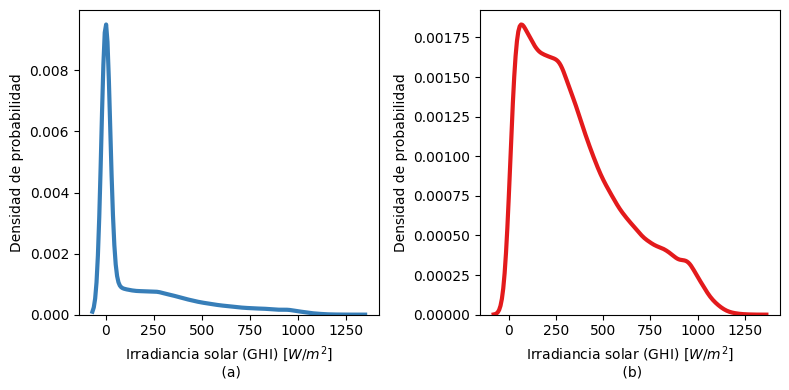

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.kdeplot(concat_df['ghi'], ax=ax[0], color = '#377eb8', linewidth = 3)
ax[0].set_xlabel(r'Irradiancia solar (GHI) [$W/m^2$]' + '\n (a)')
ax[0].set_ylabel('Densidad de probabilidad')
sns.kdeplot(udek_df['ghi'], ax=ax[1], color = '#e31a1c', linewidth = 3)
ax[1].set_xlabel(r'Irradiancia solar (GHI) [$W/m^2$]' + '\n (b)')
ax[1].set_ylabel('Densidad de probabilidad')

plt.tight_layout()
fig.savefig("kde_udenar_ghi.pdf", format='pdf', dpi=300)

In [108]:
solk_df = sol_f1_df.loc['2022-3-25':'2023-1-12'].groupby(pd.Grouper(freq='D'), group_keys=False).apply(filter_data)
solk_df = solk_df.dropna()

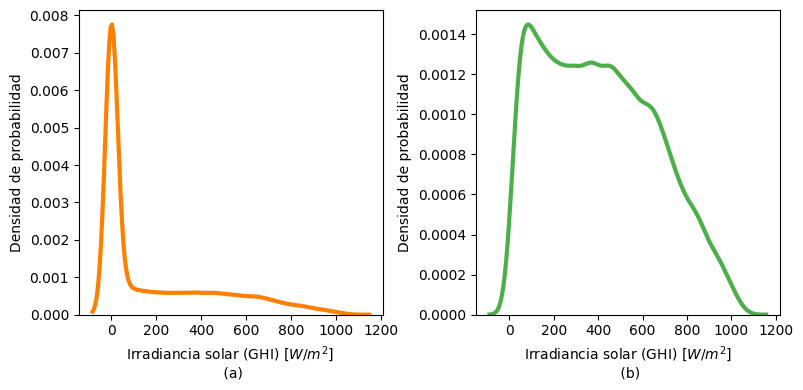

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.kdeplot(sol_f1_df['ghi'], ax=ax[0], color = '#ff7f00', linewidth = 3)
ax[0].set_xlabel(r'Irradiancia solar (GHI) [$W/m^2$] ' + '\n (a)')
ax[0].set_ylabel('Densidad de probabilidad')
sns.kdeplot(solk_df['ghi'], ax=ax[1], color = '#4daf4a', linewidth = 3)
ax[1].set_xlabel(r'Irradiancia solar (GHI) [$W/m^2$]' + '\n (b)')
ax[1].set_ylabel('Densidad de probabilidad')

plt.tight_layout()
fig.savefig("kde_solcast_ghi.pdf", format='pdf', dpi=300)

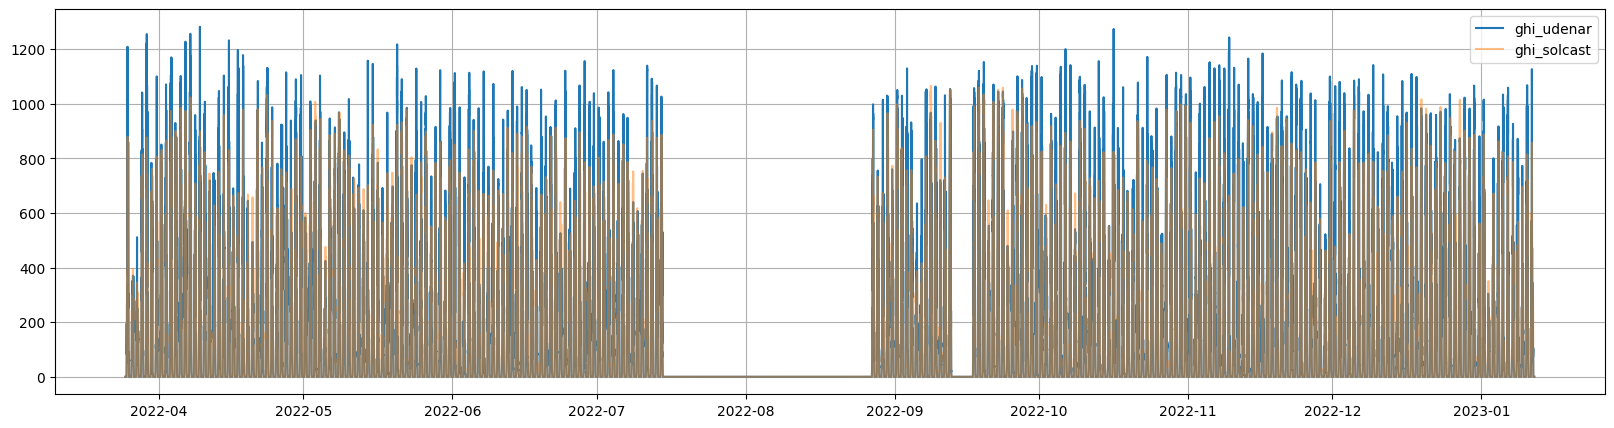

In [60]:
plt.figure(figsize=(20,5))
plt.plot(udenar_f1_df)
plt.plot(solup_df,alpha=0.5)
plt.legend(['ghi_udenar','ghi_solcast'])
plt.grid(True)
plt.show()

In [ ]:
cambiar_directorio('C:/Users/ktima/OneDrive/Escritorio/proyectos/codigos_tesis/codigos_preprocesamiento_vm')
print(os.getcwd())   

In [ ]:
# os.mkdir('Datasets_preprocesados')

In [ ]:
# udenar_f1_df.to_csv('C:/Users/ktima/OneDrive/Escritorio/proyectos/codigos_tesis/codigos_preprocesamiento_vm/Datasets_preprocesados/irradiancia_preprocesada_udenar.csv')
# sol_f1_df.to_csv('C:/Users/ktima/OneDrive/Escritorio/proyectos/codigos_tesis/codigos_preprocesamiento_vm/Datasets_preprocesados/irradiancia_preprocesada_solcast.csv')